                         # TP 2

In [4]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# Lectura de archivos

## Karate

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]
Graph with 34 nodes and 78 edges


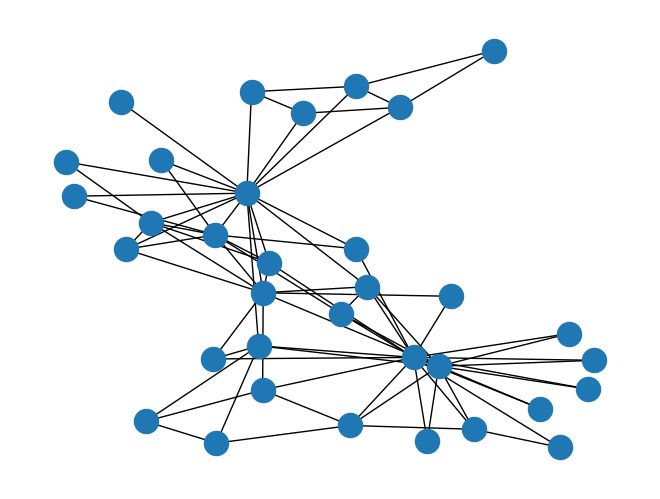

In [84]:
narray = np.genfromtxt("instancias/karateclub_matriz.txt")
print(narray)
A = nx.from_numpy_array(narray)
print(A)
nx.draw(A)

## Vector resultado de karate

In [85]:
f = open("instancias/karateclub_labels.txt")
res = []
for line in f:
    res.append(int(line))
np.array(res)
print(res)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Resultado de computo de autovalores y autovectores (formato propio)

In [26]:
#el formato de archivo es definido por nosotros, tiene primero un renglon de autovalores y despues un reglon con cada
#autovector
def readEigenValuesAndVectors(filename):
    f = open(filename)
    intLists = []
    for line in f:
        intLists.append([float(n) for n in line.split()])
    eigenvalues= intLists[0]
    eigenvectors= intLists[1:]
    print(eigenvalues)
    return eigenvalues,eigenvectors

## Facebook

### Crear matriz con nodos ordenados

In [5]:
def readEdgeListOrd(path):
    nodes = []
    with open(path) as edgelist:
        for line in edgelist:
            for node in line.split():
                if int(node) not in nodes:
                    nodes.append(int(node))
    nodes.sort()
    matrix = np.zeros((len(nodes), len(nodes)))
    with open(path) as edgelist:
        for line in edgelist:
            n1, n2 = line.split()
            i = nodes.index(int(n1))
            j = nodes.index(int(n2))
            matrix[i, j] = 1
    return matrix, nodes

In [88]:
G = nx.read_edgelist("instancias/ego-facebook.edges")
print(G)
#nx.draw(G)
narray = nx.to_numpy_array(G)
print(narray)

Graph with 786 nodes and 14024 edges
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Autovalores y autovectores de club de karate

### Correlacion

In [23]:
def correlation(v1, v2):
    numerador= np.dot((v1- np.mean(v1)),(v2 - np.mean(v2)))
    denominador = np.sqrt(np.dot(np.dot(v1- np.mean(v1),v1- np.mean(v1)),np.dot(v2 - np.mean(v2),v2 - np.mean(v2))))
    if denominador == 0:
        print(v1)
        print(v2)
    return abs(numerador/denominador)

[18.1367, 17.0552, 13.3061, 10.9211, 9.77724, 6.9962, 6.51554, 6.33159, 5.61803, 5.3786, 4.58079, 4.48001, 4.27588, 3.47219, 3.37615, 3.38197, 3.24207, 3.01396, 2.74916, 2.48709, 2.0, 2.0, 2.0, 2.0, 2.0, 1.95505, 1.82606, 1.7619, 1.59928, 1.2594, 1.12501, 0.909248, 0.468525, 4.46593e-11]


[Text(0.5, 0, 'indice'), Text(0, 0.5, 'valor')]

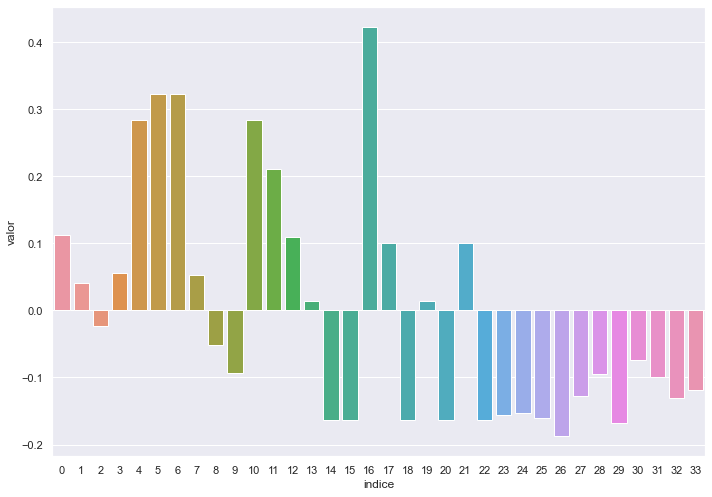

In [53]:
eigenvalues, eigenvectors =readEigenValuesAndVectors("instancias/karate_laplaciana.txt.out")
vector= eigenvectors[len(eigenvectors)-2]
x= [n for n in range(len(vector))]
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax= sns.barplot(y=vector,x=x)
ax.set(xlabel='indice', ylabel='valor')

# Escritura de archivos

In [91]:
def FileWriter5000(fileName,A, ANodeCount, AEdgeCount ):
    f = open(fileName, 'w')
    f.write(str(ANodeCount) + "\n")
    f.write(str(AEdgeCount) + "\n")
    lines = nx.generate_edgelist(A, data=False)
    for line in lines:
        f.write(line + "\n")
    f.close()

In [92]:
def FileWriter6000WeightedEdition(fileName,A, ANodeCount, AEdgeCount ):
    f = open(fileName, 'w')
    f.write(str(ANodeCount) + "\n")
    f.write(str(AEdgeCount))
    nx.write_weighted_edgelist(A, fileName)
    f.close()

### Laplaciana

In [93]:
def Laplaciana(A):
    L = np.zeros(A.shape)
    sum_fila = np.zeros(A.shape[0])
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if j != i and A[i][j] != 0: 
                sum_fila[i] += 1
    for i in range(sum_fila.shape[0]):
        L[i,i] = sum_fila[i]
    return L - A

# Procesamiento

In [94]:
FileWriter5000("instancias/karatev2.txt",A,34,78)
narray = np.genfromtxt("instancias/karateclub_matriz.txt")
A = nx.from_numpy_array(Laplaciana(narray))
print(A)
FileWriter6000WeightedEdition("instancias/karate_laplaciana.txt",A,34,112)

Graph with 34 nodes and 112 edges


# Correlacion de vectores

# Matriz de similaridad

In [14]:
def sim(A):
    return A @ np.transpose(A)
            

## Pruebas

In [96]:
v1 = [1,2,3]
v2 = [7,0,6]
print(correlation(v1,v2))
readEigenValuesAndVectors("instancias/fileReadExample.txt")

0.13206763594884358
[1.0, 2.0, 3.0, 4.0, 5.0]


([1.0, 2.0, 3.0, 4.0, 5.0],
 [[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
  [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0],
  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
  [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0],
  [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0],
  [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]])

# Computo de Laplaciana

In [97]:
def Laplaciana(A):
    L = np.zeros(A.shape)
    sum_fila = np.zeros(A.shape[0])
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if j != i and A[i][j] != 0: 
                sum_fila[i] += 1
    for i in range(sum_fila.shape[0]):
        L[i,i] = sum_fila[i]
    return L - A

# Grafo desde matriz de atributos

In [12]:
def readAttrMatrix(path, nodes):
    matrix = []
    with open(path) as attr:
        for line in attr:
            parsed = list(map(int, line.split()))
            node = parsed[0]
            if node in nodes:
                matrix.append(parsed[1:])
    return np.array(matrix)

In [8]:
def graphFromAttrMatrix(A, umbral):
    B = sim(A)
    edgeCount = 0
    for i in range(B.shape[0]):
        for j in range(B.shape[1]):
            if i == j:
                B[i][j]=0
            elif B[i][j] < umbral: 
                B[i][j]=0
            else:
                edgeCount += 1
                B[i][j]=1
    return B, edgeCount // 2

In [100]:
def correr_experimento(archivo_instancia, niter, tol_conv):
    # Leer archivo de la instancia. Cambiar a donde esten los archivos
    archivo_instancia_ubicado= "instancias/" + archivo_instancia+ ".txt"

    # Crear proceso para ejecutar el codigo.
    process = subprocess.Popen(["x64/Release/TP2.exe",archivo_instancia_ubicado, niter, tol_conv])

    # Correr experimento.
    exit_code = process.wait()
    
    # Verificar que el proceso no fallo.
    if exit_code != 0: raise Exception(F"Hubo un error")
    # Leer salida de STDERR con los tiempos de ejecucion de cada metodo.
    #tiempo_de_ejecucion = float(process.stderr.read()) por ahora no

    NombreSalida=  archivo_instancia_ubicado +".out"
    return NombreSalida

In [2]:
def matrizCovarianza(A):
    C = (np.transpose(A) @ A) / (A.shape[0] - 1)
    return C

In [102]:
def PCA(A, k):
    lim = k-1
    C = matrizCovarianza(A)
    #file = correr_experimento(C)
    #eigenvalues, eigenvectors = readEigenValuesAndVectors(file)
    eigenvalues, eigenvectors = readEigenValuesAndVectors(file)
    me_quedo_con_estos_vectores_jaja_re_largo_el_nombre = eigenvectors[:lim]
    V = np.asmatrix(me_quedo_con_estos_vectores_jaja_re_largo_el_nombre)
    V_t = np.transpose(V)
    res = V_t @ A
    return res   

In [51]:
def PCA2(A, k):
    #C= A- A.mean(0)
    C=A
    eigenvalues, eigenvectors= np.linalg.eigh(C.T@C)
    return C @ eigenvectors[0:k].T

            x         y         z
0    0.868995  0.182289  0.236806
1    0.020375 -0.038780  0.047646
2    0.082745 -0.064207  0.098475
3    0.029227 -0.118672  0.129475
4    0.029227 -0.118672  0.129475
..        ...       ...       ...
781  0.047757  0.027548  0.101538
782  0.093529 -0.231789  0.078028
783  0.032230  0.036838  0.236246
784  0.032991 -0.064928  0.162634
785  0.059068 -0.024503  0.054477

[786 rows x 3 columns]


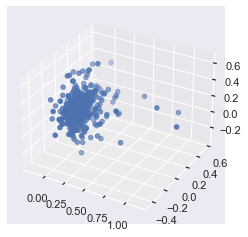

            x         y
0    0.868995  0.182289
1    0.020375 -0.038780
2    0.082745 -0.064207
3    0.029227 -0.118672
4    0.029227 -0.118672
..        ...       ...
781  0.047757  0.027548
782  0.093529 -0.231789
783  0.032230  0.036838
784  0.032991 -0.064928
785  0.059068 -0.024503

[786 rows x 2 columns]


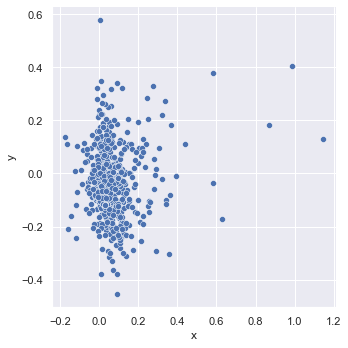

In [53]:
adjMatrix, nodes = readEdgeListOrd("instancias/ego-facebook.edges")
attrMatrix = readAttrMatrix("instancias/ego-facebook.feat", nodes)
df = pd.DataFrame(PCA2(attrMatrix,3), columns=['x', 'y',"z"])
print(df)

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['x']
y = df['y']
z = df['z']

ax.scatter(x, y, z)

plt.show()
df = pd.DataFrame(PCA2(attrMatrix,2), columns=['x', 'y'])
print(df)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g= sns.relplot(data=df, x="x", y="y" )

In [65]:


correlaciones = []
umbrales = [1/25,2/25]
adjVector,n = graphFromAttrMatrix(attrMatrix, 6)
adjVector= adjVector.flatten()
ks= [2,3]
columnas=["umbral","dimensiones","correlacion"]

for k in ks:
    for n in umbrales:
        res, edgeCount = graphFromAttrMatrix(PCA2(attrMatrix,k), n)
        res = res.flatten()
        correlaciones.append([n,k,correlation(adjVector, res)])


df = pd.DataFrame(correlaciones, columns=columnas)
print(df)

   umbral  dimensiones  correlacion
0    0.04            2     0.136102
1    0.08            2     0.102876
2    0.04            3     0.128447
3    0.08            3     0.140447


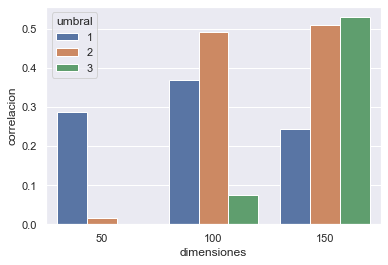

In [63]:
ax= sns.barplot(data=df,y="correlacion",x="dimensiones",hue="umbral")

## Matrices de adyacencia por umbral

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

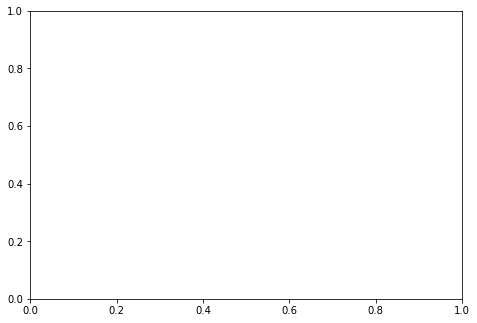

In [24]:
adjMatrix, nodes = readEdgeListOrd("instancias/ego-facebook.edges")
adjVector = adjMatrix.flatten()
attrMatrix = readAttrMatrix("instancias/ego-facebook.feat", nodes)
nx.draw(nx.from_numpy_array(graphFromAttrMatrix(attrMatrix, 6)[0]))
#G= nx.from_numpy_array(graphFromAttrMatrix(attrMatrix, 6)[0])
#nx.draw(G)

In [11]:
covarianzas = []
umbrales = [n for n in range(15)]
for n in umbrales:
    res, edgeCount = graphFromAttrMatrix(attrMatrix, n)
    res = res.flatten()
    covarianzas.append(correlation(adjVector, res))


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11232\1997953317.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return abs(numerador/denominador)


[0.007783642534154871, 0.003890892963488705, 0.008418635589437139, 0.011872921989008236, 0.012595707933087046, 0.010577382631587254, 0.012600021712202779, 0.008068856570359068, 0.006257044019227337, 0.0011229060809083396, 8.050900402045205e-05, 0.0005266587903832368, 0.001109841039798383, 0.0005549151304809482, nan]


<AxesSubplot:xlabel='Umbrales', ylabel='Correlaciones'>

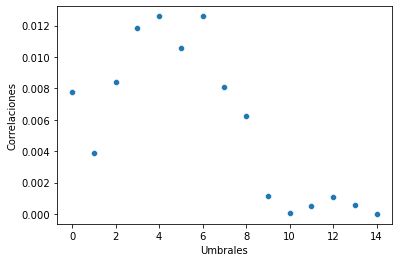

In [12]:
print(covarianzas)
covarianzas[-1] = 0
tuples = []
for i in range(len(umbrales)):
    tuples.append([umbrales[i], covarianzas[i]])
data = pd.DataFrame(tuples, columns=['Umbrales', 'Correlaciones'])
sns.scatterplot(data=data, x='Umbrales', y='Correlaciones')